In [33]:
%matplotlib inline

import pandas
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import scipy as sp

import ipywidgets as ipyw
import json

# donde centrar todos los mapas
center_mx = [23.3650705, -103.5735145]

#---------------¿La población atendida corresponde con la población objetivo del programa?---------------


# El cruce con el RNPA y después con la base de permisos nos ayuda a identificar algunas características. 

# Todos las embarcaciones que tienen permisos
# 'RNPA', 'Embarcacion', 'Tipo', 'Municipio', 'Localidad', 'Estado', 'Ano_Construido'
activos = pandas.read_csv('../datos/activos.csv')

# Un ejemplo de embarcaciones y sus RNPA
activos.head()

,id,rnpa,nombre,tipo,municipio,localidad,estado,ano_construccion,cod_inegi_municipio,cod_inegi_localidad
0,1,2015956,CENTRO ACUICOLA DE EJIDO ERENDIRA,CENTRO ACUÍCOLA,ENSENADA,EJIDO ERENDIRA,BAJA CALIFORNIA,NO APLICA,2001.0,2001095.0
1,2,3120474,GRANJA CET MAR,CENTRO ACUÍCOLA,LA PAZ,LA PAZ,BAJA CALIFORNIA SUR,NO APLICA,3003.0,3003001.0
2,3,3026408,CENTRO ACUICOLA DE BAHÍA TORTUGAS,CENTRO ACUÍCOLA,MULEGE,BAHIA TORTUGAS,BAJA CALIFORNIA SUR,NO APLICA,3002.0,3002015.0
3,4,3019353,S.C.P.P BUZOS Y PESCADORES DE LA BAJA CALIFORN...,CENTRO ACUÍCOLA,MULEGE,BAHIA TORTUGAS,BAJA CALIFORNIA SUR,NO APLICA,3002.0,3002015.0
4,5,3120524,UNIDAD DE PRODUCCIÓN PARA LA ENGORDA DE ABULO...,CENTRO ACUÍCOLA,MULEGE,LA BOCANA,BAJA CALIFORNIA SUR,NO APLICA,3002.0,3002022.0


In [12]:
# Mapa de las embaraciones por estado, tomando en cuenta donde hay más embarcaciones registradas

municipalities.plot()

In [15]:
# RNPA de la persona fisica o moral

# 'Tipo', 'RNPA', 'Nombre', 'Fecha_Registro', 'Tipo_Persona', 'Representante_Legal', 'Estado', 'Municipio', 'Localidad', 'Inicio_Operaciones'
unidades = pandas.read_csv('../datos/unidades_economicas.csv')

unidades.head()


,Tipo,RNPA,Nombre,Fecha_Registro,Tipo_Persona,Representante_Legal,Estado,Municipio,Localidad,Inicio_Operaciones
0,CAPTURA,1404004490,"HUAJACATLAN, S.C. DE R.L. DE C.V.",02/12/15,MORAL,JOSE FRANCISCO GALINDO LOPEZ,JALISCO,HOSTOTIPAQUILLO,HOSTOTIPAQUILLO,NO DISPONIBLE
1,ACUACULTURA,2100005309,JOSE MEJIA CORTEZ,18/11/14,FISÍCA,JOSE MEJIA CORTEZ,PUEBLA,TLAPANALA,SANTA CATARINA COATEPEC,NO DISPONIBLE
2,CAPTURA,2609091588,"ACUICOLA NITY QUIJANO, SC DE RL DE CV",10/04/17,MORAL,JOSE PAUL QUIJANO MENDOZA,SONORA,HUATABAMPO,MORONCARIT,31/03/2017
3,ACUACULTURA,1603001585,AGRICULTURA EL BALCON,31/03/17,MORAL,ABEL PEDRAZA PEDRAZA,MICHOACAN,TACAMBARO,TACAMBARO DE CODALLOS,31/03/2017
4,CAPTURA,1001002219,ALVARO ZAVALA EZQUIVEL,31/03/17,FISÍCA,ALVARO ZAVALA EZQUIVEL,DURANGO,DURANGO,VILLA MONTEMORELOS,31/03/2017


In [13]:

# mapa con todos los RNPA por estado

In [63]:

# --------------- Permisos --------------- 

# Cantidad de permisos pedidos y concedidos por Estado por Año

# Año,Entidad,Permisos,Concesiones
permisos_concesiones = pandas.read_csv('datos/permisos_concesiones/permisos_concesiones.csv')

# Permisos Recibidas Distribuidas por Estado por Año

permisos_concesiones.loc[permisos_concesiones['Ano'] == 2009][['Entidad', 'Permisos', 'Concesiones']].groupby(['Entidad']).sum()

# Para el año 2009

,Permisos,Concesiones
Entidad,,
BAJA CALIFORNIA,162,0
BAJA CALIFORNIA SUR,10,0
CAMPECHE,30,0
CHIAPAS,7,0
COLIMA,3,0
GUERRERO,2,0
HIDALGO,0,0
JALISCO,1,0
MICHOACAN,0,0


In [38]:
permisos_concesiones.loc[permisos_concesiones['Ano'] == 2012][['Entidad', 'Permisos', 'Concesiones']].groupby(['Entidad']).sum()
# Para el año 2012

,Permisos,Concesiones
Entidad,,
BAJA CALIFORNIA,206,4
BAJA CALIFORNIA SUR,5,0
CAMPECHE,19,0
CHIAPAS,0,0
COLIMA,0,0
GUERRERO,8,0
HIDALGO,0,0
JALISCO,0,0
MICHOACAN,2,0


In [39]:
permisos_concesiones.loc[permisos_concesiones['Ano'] == 2015][['Entidad', 'Permisos', 'Concesiones']].groupby(['Entidad']).sum()
# Para el año 2015

,Permisos,Concesiones
Entidad,,
BAJA CALIFORNIA,379,1
BAJA CALIFORNIA SUR,100,0
CAMPECHE,36,0
CHIAPAS,6,4
COLIMA,7,0
GUERRERO,27,0
HIDALGO,1,0
JALISCO,11,0
MICHOACAN,0,0


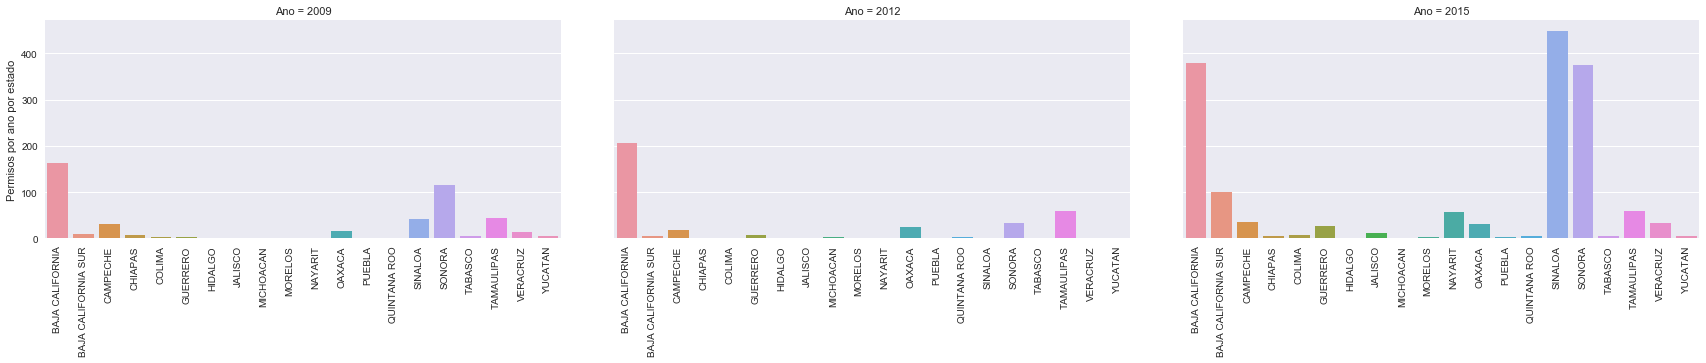

In [65]:
# Permisos  Distribuidas por Estado por Año
g2 = sns.factorplot(x="Entidad", y="Permisos", col="Ano", data=permisos_concesiones,kind="bar", ci=None, aspect=2)
(g2.set_axis_labels("", "Permisos por ano por estado").set_xticklabels(rotation=90))


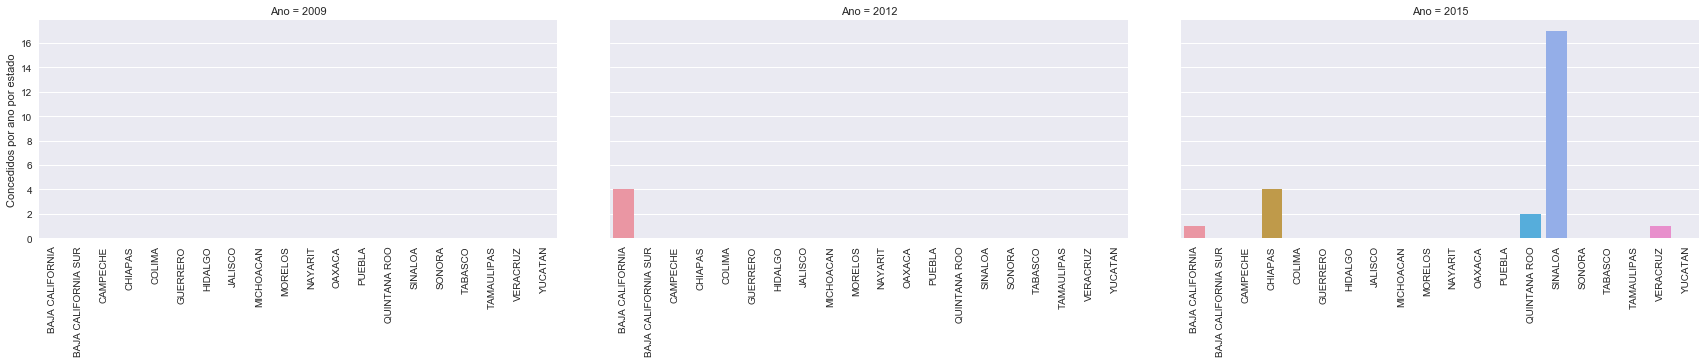

In [66]:
# Permisos Concedidas Distribuidas por Estado por Año
g2 = sns.factorplot(x="Entidad", y="Concesiones", col="Ano", data=permisos_concesiones,kind="bar", ci=None, aspect=2)
(g2.set_axis_labels("", "Concedidos por ano por estado").set_xticklabels(rotation=90))

In [42]:
# Permisos

# Estado,Municipio,Localidad,RNPA,Titular,Especie,Area,Inicio,Termino
permisos = pandas.read_csv('datos/permisos.csv')

permisos.head()


,tipo_embarcacion,estado,municipio,localidad,rnpa,titular,especie,area,inicio,termino
0,mayores,SINALOA,MAZATLAN,MAZATLAN,2.508015e+09,AARON IGNACIO FREGOSO URIAS,CAMARON DE ALTAMAR,LITORAL DEL OCEANO PACIFICO,07/06/11,07/05/15
1,mayores,BAJA CALIFORNIA,ENSENADA,ENSENADA,2.030077e+08,"ACUAPRODUCTOS BAJA, S.A. DE C.V.",CANGREJO,AGUAS DE JURISDICCIÃN FEDERAL DEL LITORAL DEL...,06/03/11,06/02/15
2,mayores,BAJA CALIFORNIA,ENSENADA,ENSENADA,2.030077e+08,"ACUAPRODUCTOS BAJA, S.A. DE C.V.",CANGREJO JHONGARTHI,AGUAS DE JURISDICCIÃN FEDERAL DEL LITORAL DEL...,06/30/06,06/29/10
3,mayores,BAJA CALIFORNIA,ENSENADA,ENSENADA,2.030077e+08,"ACUAPRODUCTOS BAJA, S.A. DE C.V.",JAIBA,AGUAS DE JURISDICCIÃN FEDERAL DEL LITORAL DEL...,06/03/11,06/02/15
4,mayores,BAJA CALIFORNIA,ENSENADA,ENSENADA,2.030077e+08,"ACUAPRODUCTOS BAJA, S.A. DE C.V.",ESCAMA MARINA,AGUAS DE JURISDICCIÃN FEDERAL DEL LITORAL DEL...,06/03/11,06/02/15


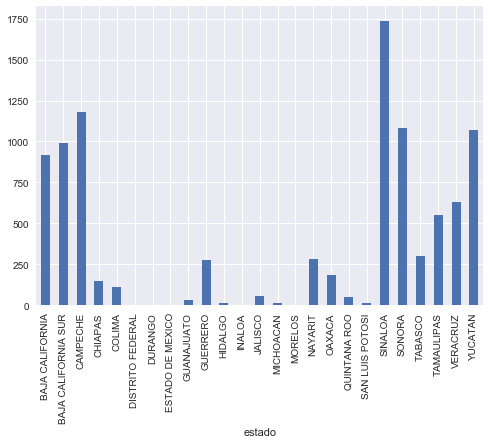

In [92]:
# Permisos por estado 
permisos.groupby('estado').size().plot.bar()

# ax = sns.countplot(x="estado", data=permisos)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


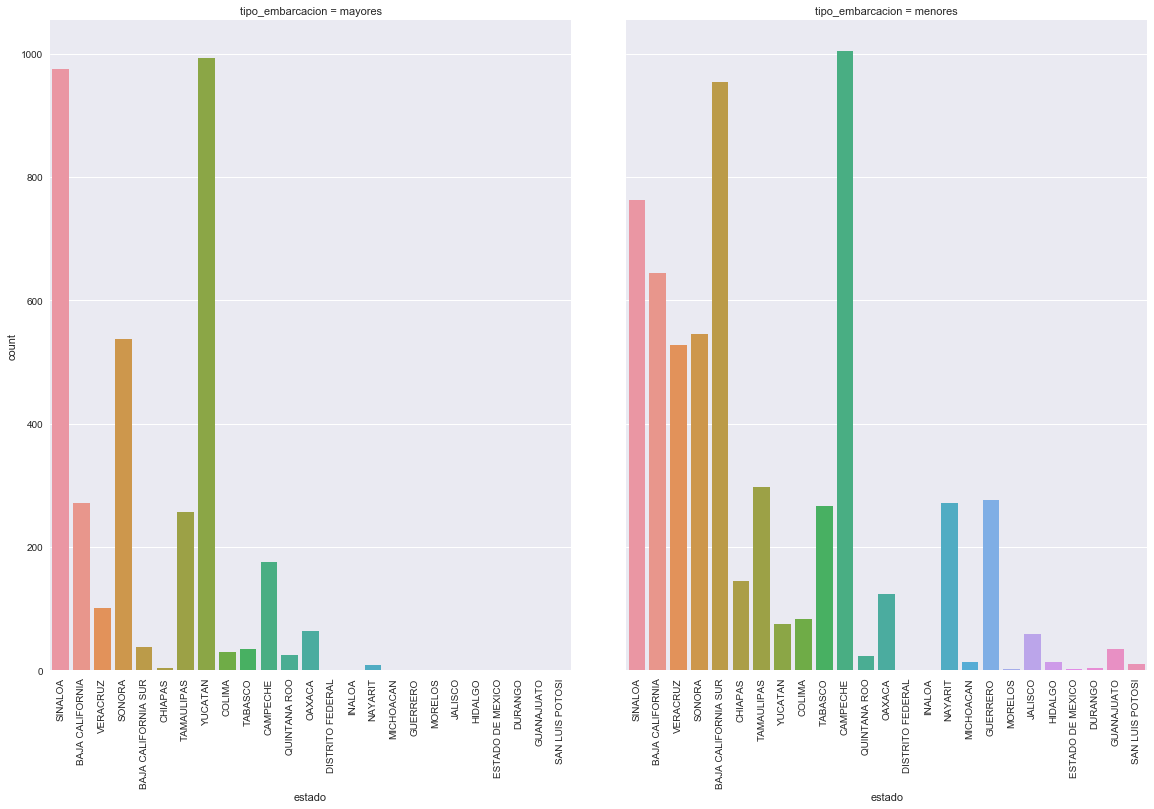

In [76]:
# Cantidad de Permisos Distribuidas por Estado por Tipo de Embarcacion
g = sns.factorplot("estado", col="tipo_embarcacion", col_wrap=4, 
                    data=permisos[permisos.tipo_embarcacion.notnull()], 
                    kind="count", size=10, aspect=.8)

g.set_xticklabels(rotation=90)

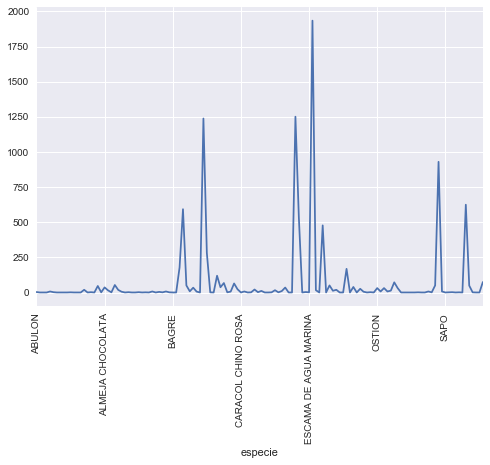

In [51]:
# Cantidad de permisos por especie

permisos.groupby('especie').size().plot(rot=90)

In [ ]:

g = sns.factorplot("especie", col="rnpa", col_wrap=4, 
                    data=permisos, 
                    kind="count", size=10, aspect=.8)

g.set_xticklabels(rotation=90)

In [61]:

############# En teoría, solo las personas con permiso pueden ser beneficiarios #############

# Beneficiarios de todas las tablas de beneficios cruzados con la tabla de permisos. 
# <-- hay que chequear fecha de inicio y fin del permiso con cuando fue el beneficio concedido
# Guardamos los beneficiarios que no estan en la tabla de permisos. Podemos suponer que no tiene permiso?
beneficiarios_sin_permiso = pandas.read_csv('datos/beneficiarios_sin_permisos.csv')

beneficiarios_sin_permiso.head()


,rnpa,nombre
0,NaN,7 ADELANTE AGRICULTORES S DE SS
1,NaN,ABEL TALAVERA PANIAGUA
2,NaN,ABEL ALCUDIA DIAZ
3,NaN,ABEL AVILA ZAMORA
4,NaN,ABEL BENITEZ FLORES


In [54]:
# Cantidad de beneficiarios por Estado, dividido entre los que tienen permiso y los que no


In [55]:
# Cantidad de beneficiarios por Especie, dividido entre los que tienen permiso y los que no



# Diferente color por 'Tiene' y en la misma barra - TODO


In [56]:
# Cuantas irregularidades en permisos y beneficiarios hay por estado por año

# Mapear esta información - TODO

In [57]:

# Beneficiarios con el mismo RFC y sus permisos por Especie

# Buscar la forma de mapear esta información - TODO


In [58]:
# Beneficiarios con el mismo RFC y sus permisos por Estado


# Buscar la forma de mapear esta información - TODO

In [59]:
# Contar cuantos no tienen permiso y cuantos Si

# Buscar la forma de mapear esta información - TODO


In [60]:
# En que año en que estado se dieron más beneficiarios sin permisos

# Buscar la forma de mapear esta información - TODO


In [4]:
# Cruzar beneficiarios con Grado de Marginación por Localidad

activos = pandas.read_csv('datos/activos_con_marginacion_localidad.csv')
activos.head()




,rnpa,nombre,tipo,estado,municipio,localidad,POB_TOT,IM_2010
0,2015956,CENTRO ACUICOLA DE EJIDO ERENDIRA,CENTRO ACUÍCOLA,BAJA CALIFORNIA,ENSENADA,EJIDO ERENDIRA,1461,-0.817551
1,3120474,GRANJA CET MAR,CENTRO ACUÍCOLA,BAJA CALIFORNIA SUR,LA PAZ,LA PAZ,215178,-1.476736
2,3026408,CENTRO ACUICOLA DE BAHÍA TORTUGAS,CENTRO ACUÍCOLA,BAJA CALIFORNIA SUR,MULEGE,BAHIA TORTUGAS,2671,-1.482988
3,3019353,S.C.P.P BUZOS Y PESCADORES DE LA BAJA CALIFORN...,CENTRO ACUÍCOLA,BAJA CALIFORNIA SUR,MULEGE,BAHIA TORTUGAS,2671,-1.482988
4,3120664,GRANJA DE OSTION ESTERO EL COYOTE,CENTRO ACUÍCOLA,BAJA CALIFORNIA SUR,MULEGE,PUNTA ABREOJOS,788,-1.109065


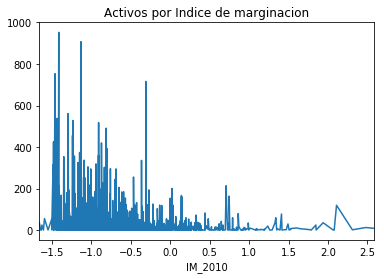

In [9]:
activos.groupby('IM_2010').size().plot(title='Activos por Indice de marginacion', x='Indice de Marginacion 2010')